In [1]:
#必要なパッケージの読み込み
import numpy as np
import pandas as pd
from scipy import stats
import scipy
from scipy.signal import find_peaks
import matplotlib.pyplot as plt
from sklearn import preprocessing
import collections


In [2]:
#目的別の変数設定
filename = 'second.csv' #読み込むcsvファイルの指定

rang = 11 #取得したROIの数
rang_o = 2 #fictive wave外の活動を見たいROI数
rang_w = 9 #fictive waveを形成するROI数

tlim_start = 0 #カルシウムトレースの描画範囲（開始時間）1/30未満の数だと壊れるので0は禁止
tlim_end = 400 #カルシウムトレースの描画範囲（終了時間）

rang_o_start = 1 #wave外のROIの内、描画するものを範囲指定。この場合1番目のROIを含んでいる。描画しないなら0
rang_o_end = 2 #wave外のROIの内、描画するものを範囲指定。この場合2番目のROIまでを含む。描画しないなら-1
rang_w_start = 1 #wave内のROIの内、描画するものを範囲指定。この場合3番目のROIを含んでいる。描画しないなら0
rang_w_end = 9 #wave内のROIの内、描画するものを範囲指定。この場合7番目のROIまでを含む。描画しないなら-1

In [3]:
#データ読み込み
Mean = []
for i in range(rang):
    Mean.append(np.array(pd.read_csv(filename)['Mean'+str(i+1)]))

time = np.arange(1, 1+len(Mean[0]), 1)/30

In [4]:
#色とラベルの指定

#色の指定
c = []
#wave外の色
for i in range(rang_o):
    c.append("hotpink")
#wave内の色
for i in range(rang_w):
    c.append("grey")
#全て別の色で指定したい場合は以下のコメントアウトのように指定
#c = ["red","orange","gold","green","blue","purple","black","red","orange","gold","green","blue","purple","black"]

#ラベルの指定
l = []
#wave外のラベルの指定
for i in range(rang_o):
    l.append("ex"+str(i+1))
#wave内のラベルの指定
for i in range(rang_w):
    l.append("m"+str(i+1))
#全て別のラベルで指定したい場合は以下のように指定
l = ["SEZ1","SEZ2","T2","T3","A1","A2","A3","A4","A5","A6","A7"]

In [5]:
#グラフの細かい指定

#グラフの大きさ
fig_size = (20.0, 10.0)

#凡例
anchor_legend = (1, 0.5) #凡例の位置
location_legend = "center" #凡例の細かい位置
font_legend = 24 #凡例の大きさ

#左下の数値
scale_t = 10 #時間軸の長さ
nori = 2 #左側にのりしろをどれだけ取るか
v_h = -2 #縦軸ラベルの横位置調整
h_h = 3 #時間軸ラベルの横位置調整

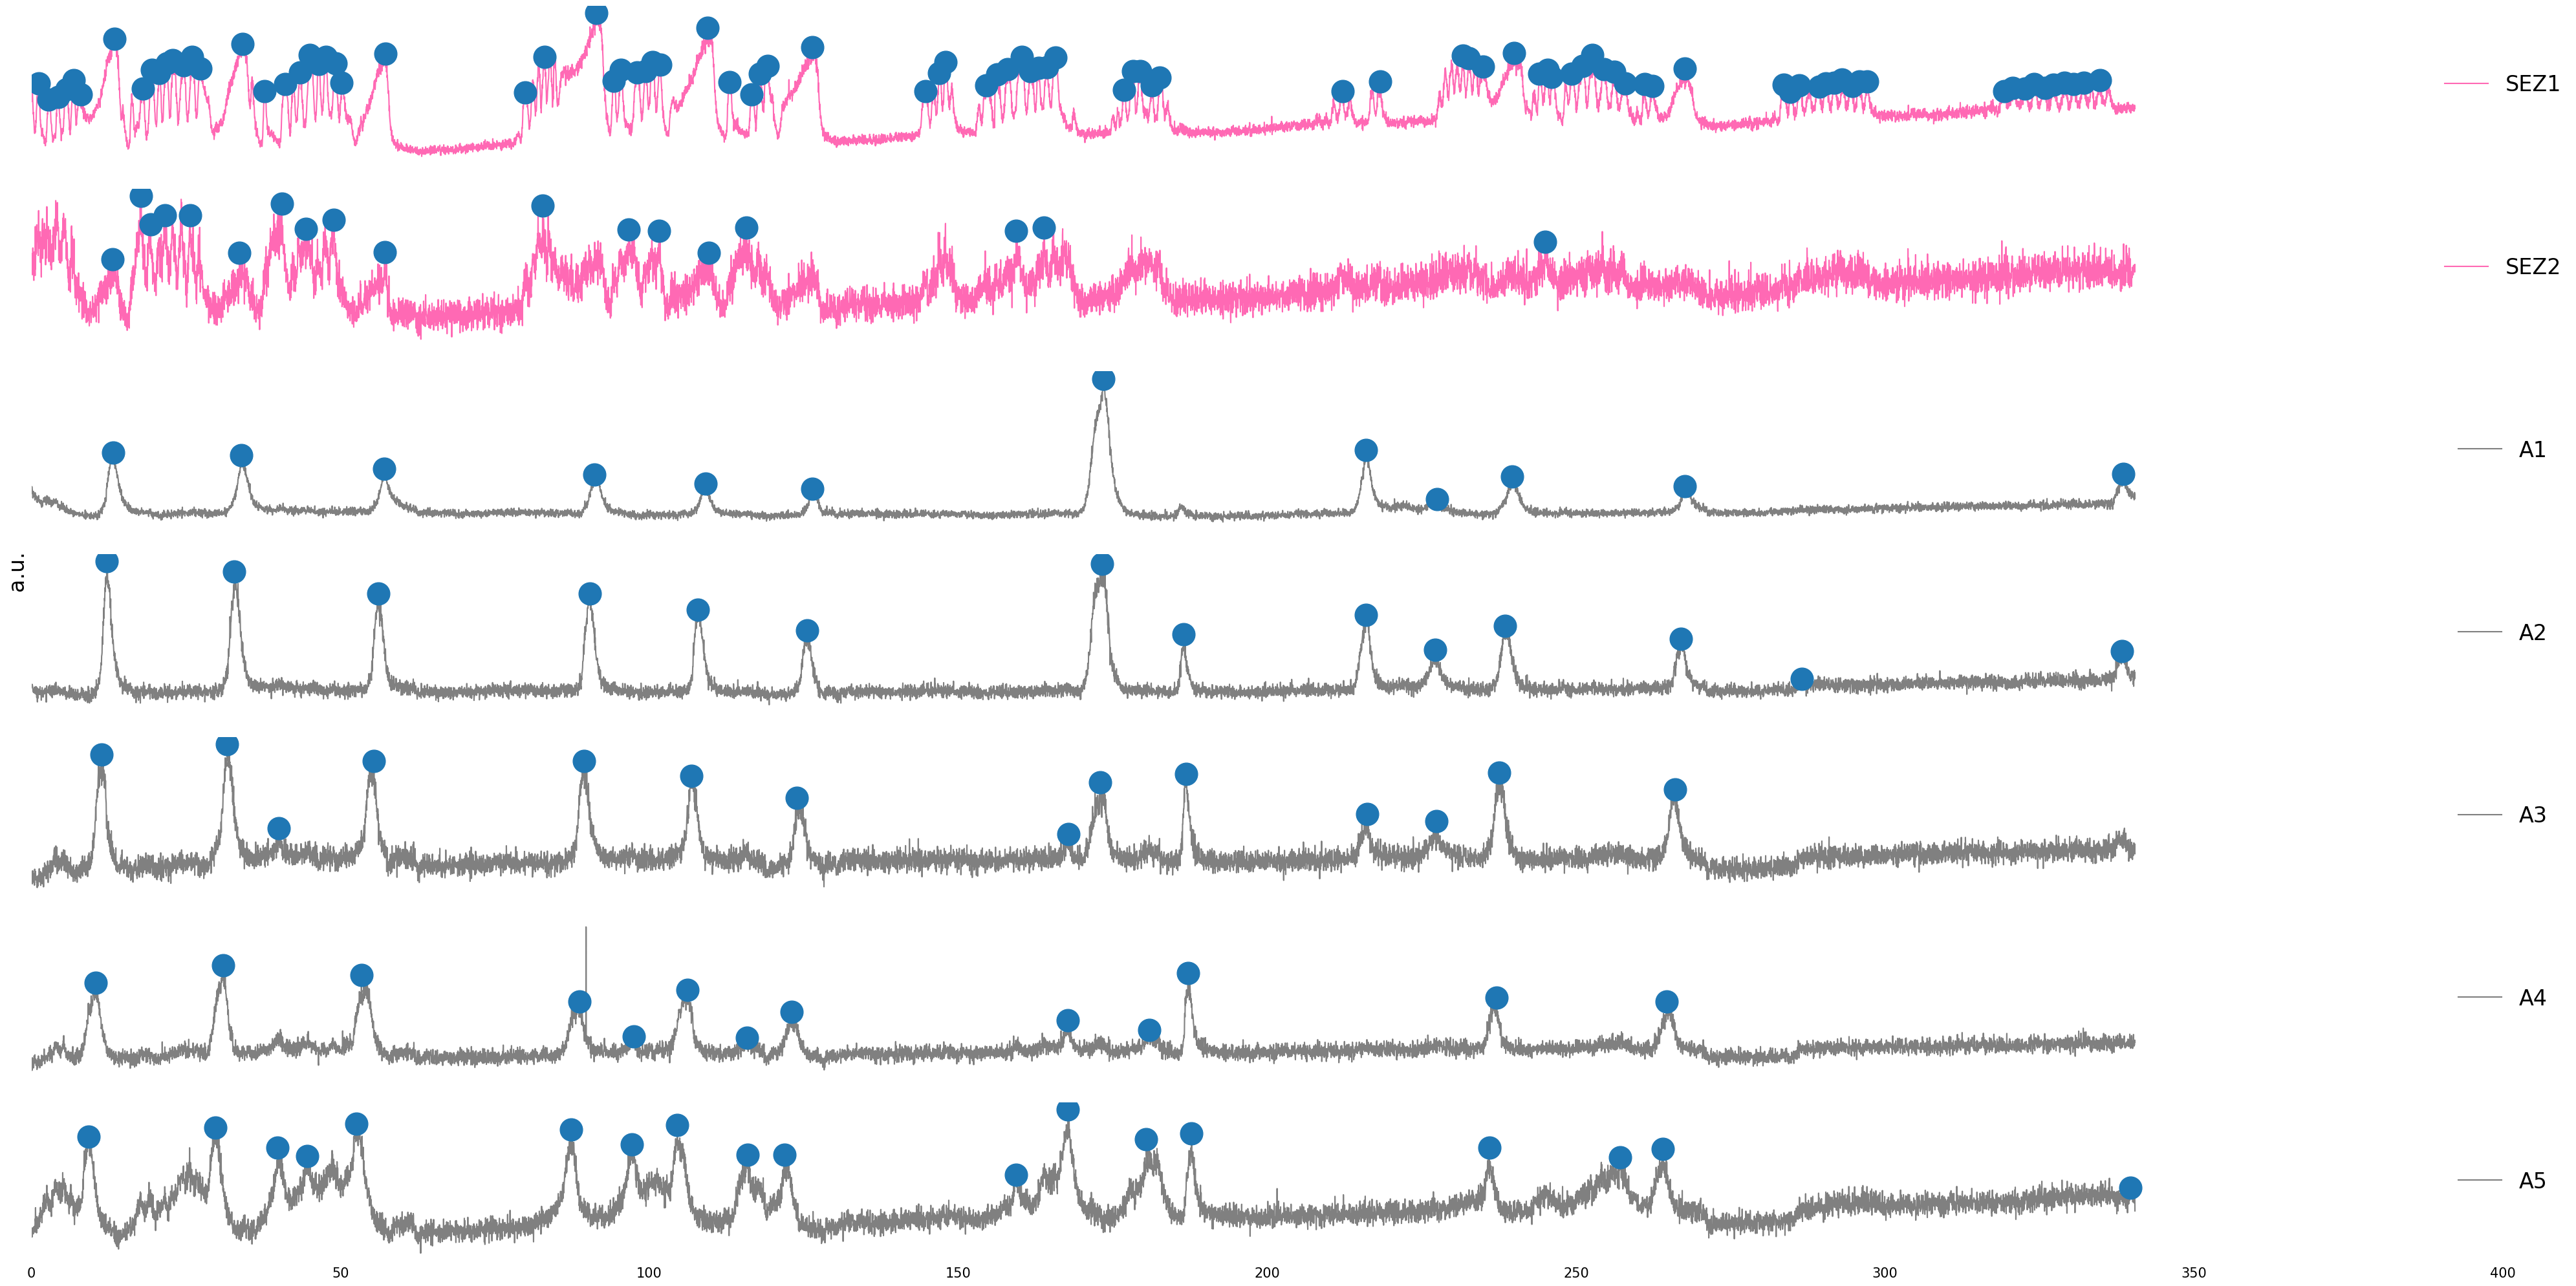

In [45]:
fig = plt.figure(figsize=(40.0, 20.0))
plt.ylabel("a.u.", fontsize = 24, y=0.55)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['bottom'].set_visible(False)
plt.gca().spines['left'].set_visible(False)
plt.tick_params(labelbottom=False, labelleft=False, labelright=False, labeltop=False, bottom=False, left=False, right=False, top=False)
#add_subplot()でグラフを描画する領域を追加する．引数は行，列，場所

def func2(F, time):
        param = scipy.optimize.curve_fit(lambda t,a,b:a*np.exp(b*t), time , F, p0 = (F[0], -0.000001))[0]
        return param[0] * np.exp(param[1]*time)
#        return (F-exp_base)/exp_base

mmean = []
for i in range(rang):
    mmean.append([])
for i in range(rang):
    mmean[i] = func2(Mean[i], time)

#Mean = preprocessing.minmax_scale(mmean, axis=1)
MeanM = []
for i in range(rang):
    MeanM.append([])

for i in range(rang):
    MeanM[i] = (Mean[i] - mmean[i])/mmean[i]

mean = preprocessing.minmax_scale(MeanM, axis=1)

rang_o_rang = rang_o_end - rang_o_start + 1
rang_w_rang = rang_w_end - rang_w_start + 1
rang_draw = rang_o_rang + rang_w_rang

#peakの取得
peaks = [0]*rang
wid = 0.5 #(second)
for i in range(rang):
    peaks[i], _ = find_peaks(mean[i], height=0.15, width=wid*30)
#print(peaks)

ax = []
for i in range(rang_draw):
    ax.append(fig.add_subplot(rang_draw, 1, i+1))
    plt.xlim(tlim_start,tlim_end)
    if i <= (rang_draw-2):
        plt.xticks(color="None")

plt.tick_params(labelsize=15)        

if rang_o_start > 0:
    for i in range(rang_o_rang):
        ax[i].plot(time, mean[i+rang_o_start-1], color=c[i+rang_o_start-1], label=l[i+rang_o_start-1])
        ax[i].plot(time[peaks[i+rang_o_start-1]], mean[i+rang_o_start-1][peaks[i+rang_o_start-1]], ".", markersize =50)
        ax[i].spines['right'].set_visible(False)
        ax[i].spines['top'].set_visible(False)
        ax[i].spines['bottom'].set_visible(False)
        ax[i].spines['left'].set_visible(False)    
        ax[i].legend(bbox_to_anchor=anchor_legend, loc =location_legend, fontsize=font_legend, frameon=False)
        ax[i].tick_params(labelbottom=True, labelleft=False, labelright=False, labeltop=False)
        ax[i].tick_params(bottom=False, left=False, right=False, top=False)

if rang_w_start > 0:
    for i in range(rang_w_rang):
        ax[i+rang_o_rang].plot(time, mean[i+rang_o+rang_w_start-1], color=c[i+rang_o+rang_w_start-1], label=l[i+rang_o+rang_w_start-1])
        ax[i+rang_o_rang].plot(time[peaks[i+rang_o+rang_w_start-1]], mean[i+rang_o+rang_w_start-1][peaks[i+rang_o+rang_w_start-1]], ".", markersize =50)
        ax[i+rang_o_rang].spines['right'].set_visible(False)
        ax[i+rang_o_rang].spines['top'].set_visible(False)
        ax[i+rang_o_rang].spines['bottom'].set_visible(False)
        ax[i+rang_o_rang].spines['left'].set_visible(False)    
        ax[i+rang_o_rang].legend(bbox_to_anchor=anchor_legend, loc =location_legend, fontsize=font_legend, frameon=False)
        ax[i+rang_o_rang].tick_params(labelbottom=True, labelleft=False, labelright=False, labeltop=False)
        ax[i+rang_o_rang].tick_params(bottom=False, left=False, right=False, top=False)


fig.tight_layout()              #レイアウトの設定
plt.show()

[452, 453, 451, 454, 450, 746, 747, 745, 748, 744, 1107, 1108, 1106, 1109, 1105, 1240, 1241, 1239, 1242, 1238, 2562, 2563, 2561, 2564, 2560, 2789, 2790, 2788, 2791, 2787, 2944, 2945, 2943, 2946, 2942, 3374, 3375, 3373, 3376, 3372, 4695, 4696, 4694, 4697, 4693, 4859, 4860, 4858, 4861, 4857, 5209, 5210, 5208, 5211, 5207, 5347, 5348, 5346, 5349, 5345, 6486, 6487, 6485, 6488, 6484, 6828, 6829, 6827, 6830, 6826, 7529, 7530, 7528, 7531, 7527, 10162, 10163, 10161, 10164, 10160, 435, 436, 434, 437, 433, 1063, 1064, 1062, 1065, 1061, 2773, 2774, 2772, 2775, 2771, 3319, 3320, 3318, 3321, 3317, 5210, 5211, 5209, 5212, 5208, 6488, 6489, 6487, 6490, 6486, 6819, 6820, 6818, 6821, 6817, 7235, 7236, 7234, 7237, 7233, 10172, 10173, 10171, 10174, 10170, 395, 396, 394, 397, 393, 1018, 1019, 1017, 1020, 1016, 1711, 1712, 1710, 1713, 1709, 2732, 2733, 2731, 2734, 2730, 3273, 3274, 3272, 3275, 3271, 3792, 3793, 3791, 3794, 3790, 5204, 5205, 5203, 5206, 5202, 6477, 6478, 6476, 6479, 6475, 6823, 6824, 6822, 6

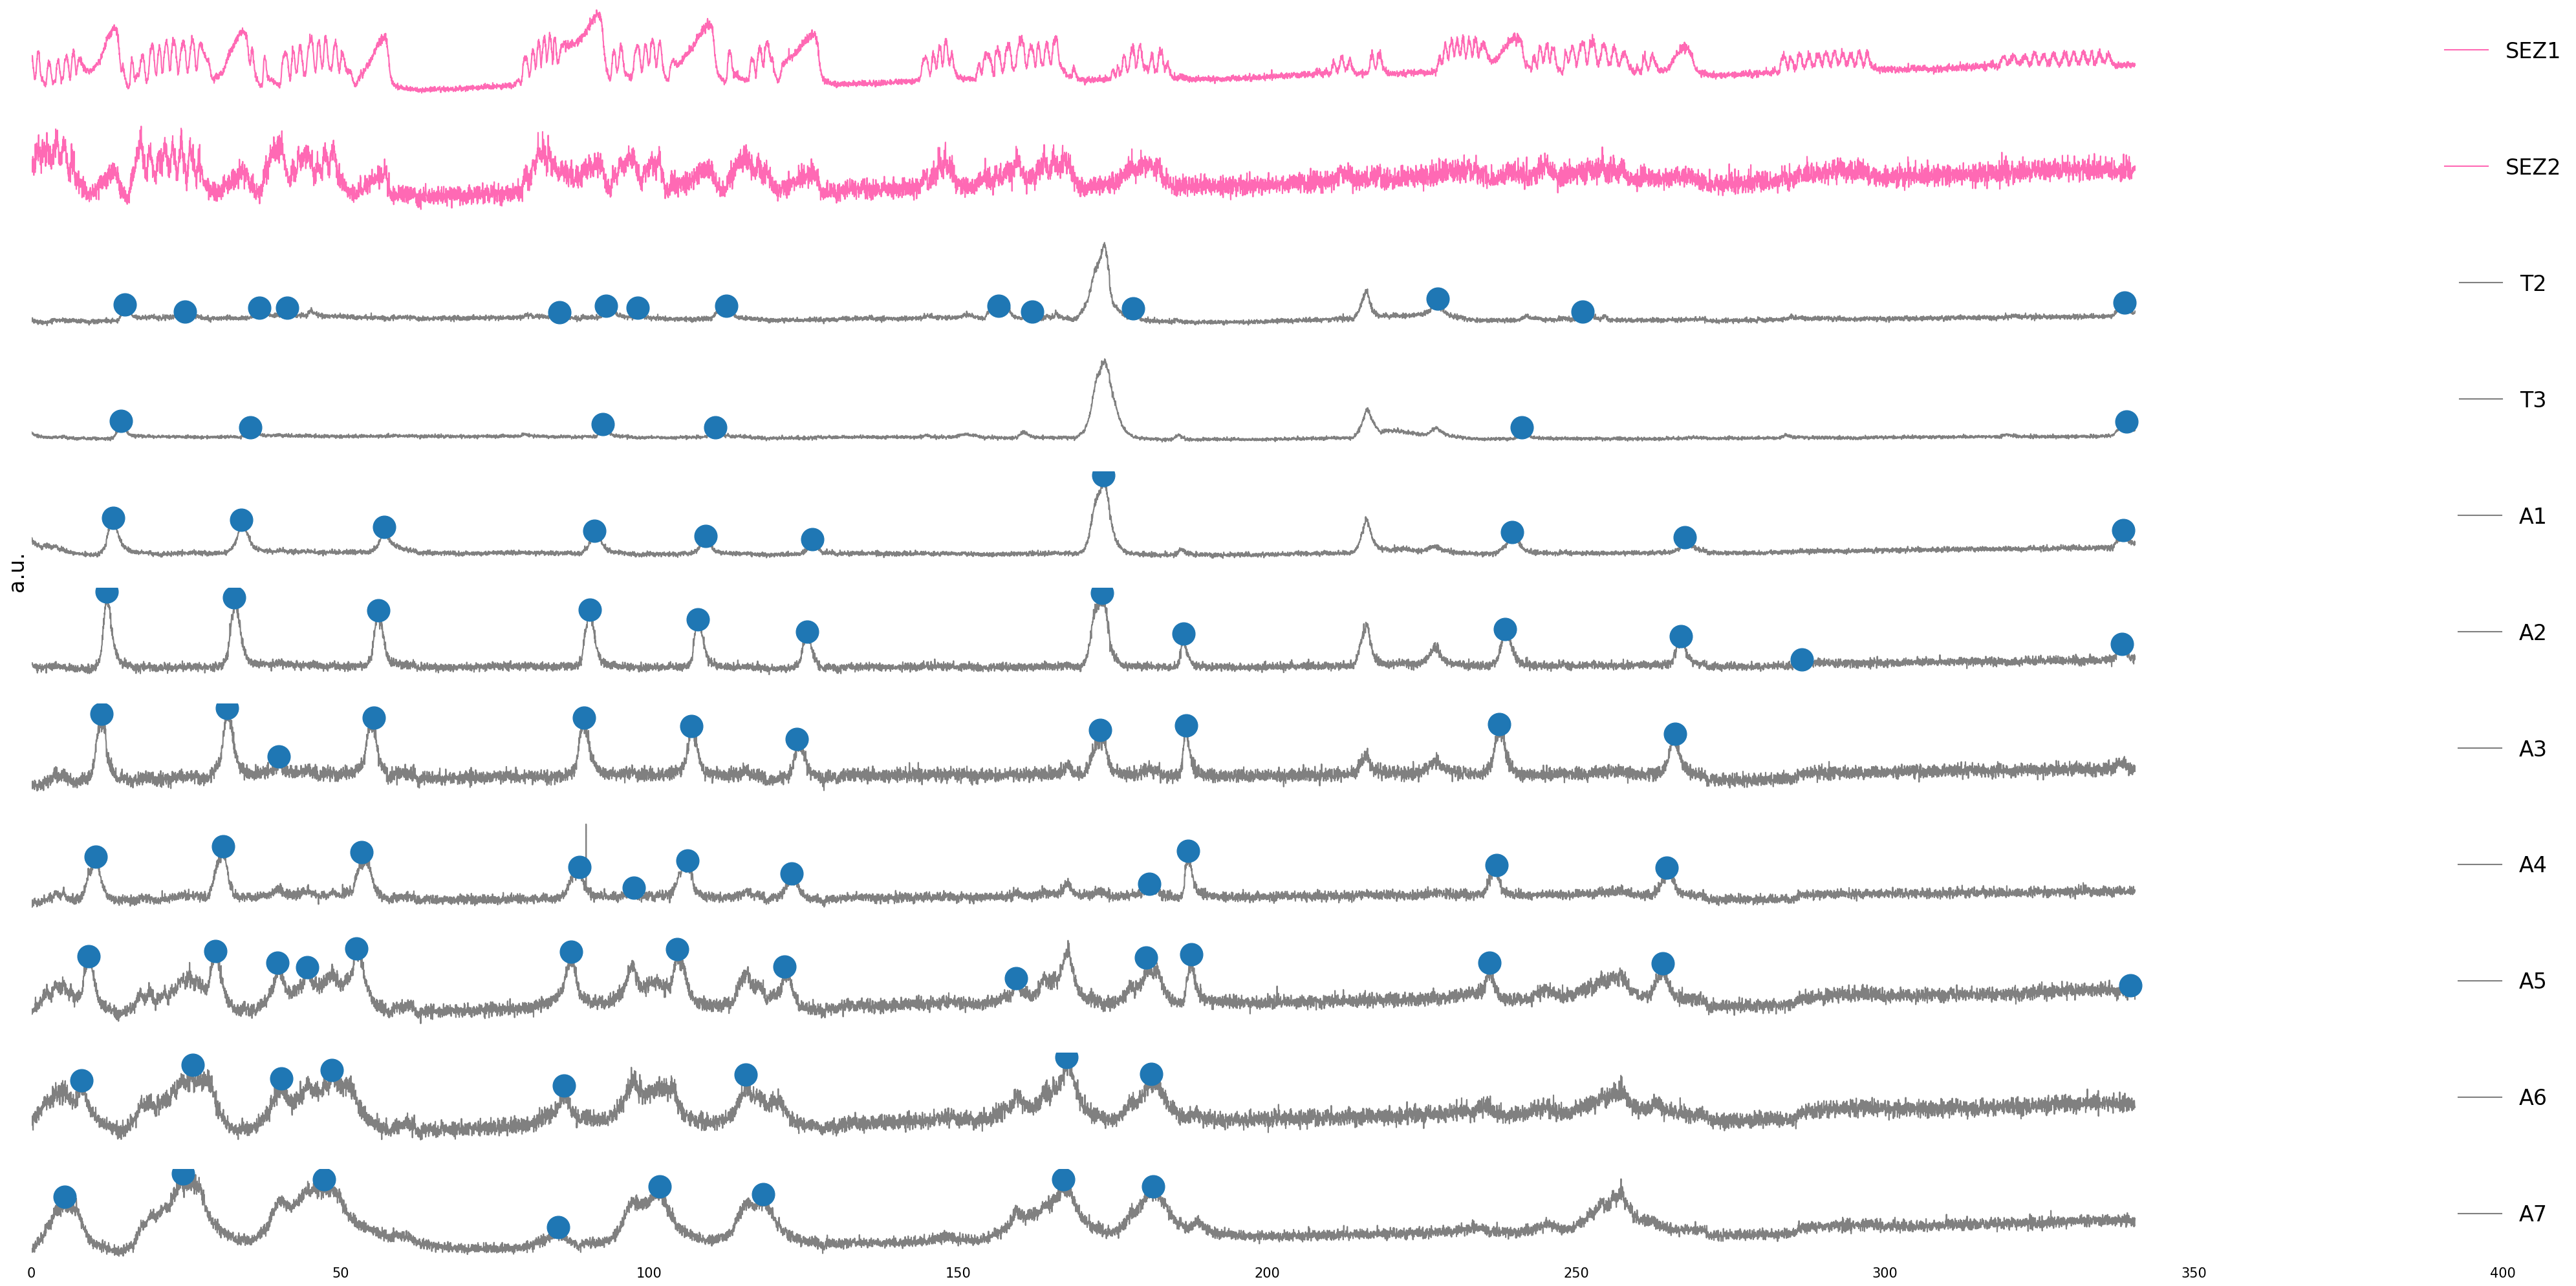

In [27]:
fig = plt.figure(figsize=(40.0, 20.0))
plt.ylabel("a.u.", fontsize = 24, y=0.55)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['bottom'].set_visible(False)
plt.gca().spines['left'].set_visible(False)
plt.tick_params(labelbottom=False, labelleft=False, labelright=False, labeltop=False, bottom=False, left=False, right=False, top=False)
#add_subplot()でグラフを描画する領域を追加する．引数は行，列，場所

def func2(F, time):
        param = scipy.optimize.curve_fit(lambda t,a,b:a*np.exp(b*t), time , F, p0 = (F[0], -0.000001))[0]
        return param[0] * np.exp(param[1]*time)
#        return (F-exp_base)/exp_base

mmean = []
for i in range(rang):
    mmean.append([])
for i in range(rang):
    mmean[i] = func2(Mean[i], time)

#Mean = preprocessing.minmax_scale(mmean, axis=1)
MeanM = []
for i in range(rang):
    MeanM.append([])

for i in range(rang):
    MeanM[i] = (Mean[i] - mmean[i])/mmean[i]

mean = preprocessing.minmax_scale(MeanM, axis=1)

rang_o_rang = rang_o_end - rang_o_start + 1
rang_w_rang = rang_w_end - rang_w_start + 1
rang_draw = rang_o_rang + rang_w_rang

#peakの取得
peaks = [0]*rang_w_rang
wid = 0.5 #(second)
for i in range(rang_w_rang):
    peaks[i], _ = find_peaks(mean[i+rang_o+rang_w_start-1], height=0.15, width=wid*30)
#print(peaks)

##burstの消去
#peaks周りの値を持ったリスト作成
peak_range = []
for i in range(len(peaks)):
    peak_range.append([])
for i in range(len(peaks)):
    for j in range(len(peaks[i])):
        peak_range[i].append(peaks[i][j])
        for k in range(same_range1):
            peak_range[i].append(peaks[i][j]+k+1)
            peak_range[i].append(peaks[i][j]-k-1)
#peak周りの値を持ったリストを一つに
ll = []
for i in range(len(peak_range)):
    ll = ll + peak_range[i]
#peak周りの値を持ったリストから重複するもののみを抽出
ly = []
for k,v in collections.Counter(ll).items():
    if v > 1:
        ly.append(k)
#burst分の削除準備        
def getNearestValue(list, num):
    """
    概要: リストからある値に最も近い値を返却する関数
    @param list: データ配列
    @param num: 対象値
    @return 対象値に最も近い値
    """

    # リスト要素と対象値の差分を計算し最小値のインデックスを取得
    idx = np.abs(np.asarray(list) - num).argmin()
    return list[idx]
#バーストのタイミングリスト
print(ll)
print(ly)
delete_list = []
for i in range(len(peaks)):
    delete_list.append([])
#fw or bw のリスト
true_list = []
for i in range(len(peaks)):
    true_list.append([])
#バースト消去
for i in range(len(peaks)):
    for j in range(len(peaks[i])):
        near = getNearestValue(ly, peaks[i][j])
        if np.abs(near - peaks[i][j]) <= same_range2:
            delete_list[i].append(peaks[i][j])
    print(delete_list)
    true_list[i] = list(set(peaks[i]) - set(delete_list[i]))

ax = []
for i in range(rang_draw):
    ax.append(fig.add_subplot(rang_draw, 1, i+1))
    plt.xlim(tlim_start,tlim_end)
    if i <= (rang_draw-2):
        plt.xticks(color="None")

plt.tick_params(labelsize=15)        

if rang_o_start > 0:
    for i in range(rang_o_rang):
        ax[i].plot(time, mean[i+rang_o_start-1], color=c[i+rang_o_start-1], label=l[i+rang_o_start-1])
    #    ax[i].plot(time[true_list[i+rang_o_start-1]], mean[i+rang_o_start-1][true_list[i+rang_o_start-1]], ".", markersize =50)
        ax[i].spines['right'].set_visible(False)
        ax[i].spines['top'].set_visible(False)
        ax[i].spines['bottom'].set_visible(False)
        ax[i].spines['left'].set_visible(False)    
        ax[i].legend(bbox_to_anchor=anchor_legend, loc =location_legend, fontsize=font_legend, frameon=False)
        ax[i].tick_params(labelbottom=True, labelleft=False, labelright=False, labeltop=False)
        ax[i].tick_params(bottom=False, left=False, right=False, top=False)

if rang_w_start > 0:
    for i in range(rang_w_rang):
        ax[i+rang_o_rang].plot(time, mean[i+rang_o+rang_w_start-1], color=c[i+rang_o+rang_w_start-1], label=l[i+rang_o+rang_w_start-1])
        ax[i+rang_o_rang].plot(time[true_list[i]], mean[i+rang_o+rang_w_start-1][true_list[i]], ".", markersize =50)
        ax[i+rang_o_rang].spines['right'].set_visible(False)
        ax[i+rang_o_rang].spines['top'].set_visible(False)
        ax[i+rang_o_rang].spines['bottom'].set_visible(False)
        ax[i+rang_o_rang].spines['left'].set_visible(False)    
        ax[i+rang_o_rang].legend(bbox_to_anchor=anchor_legend, loc =location_legend, fontsize=font_legend, frameon=False)
        ax[i+rang_o_rang].tick_params(labelbottom=True, labelleft=False, labelright=False, labeltop=False)
        ax[i+rang_o_rang].tick_params(bottom=False, left=False, right=False, top=False)

fig.tight_layout()              #レイアウトの設定
plt.show()

In [35]:
rang = 11 #取得したROIの数
rang_o = 2 #fictive wave外の活動を見たいROI数
rang_w = 9 #fictive waveを形成するROI数

tlim_start = 0 #カルシウムトレースの描画範囲（開始時間）1/30未満の数だと壊れるので0は禁止
tlim_end = 400 #カルシウムトレースの描画範囲（終了時間）

rang_o_start = 1 #wave外のROIの内、描画するものを範囲指定。この場合1番目のROIを含んでいる。描画しないなら0
rang_o_end = 2 #wave外のROIの内、描画するものを範囲指定。この場合2番目のROIまでを含む。描画しないなら-1
rang_w_start = 3 #wave内のROIの内、描画するものを範囲指定。この場合3番目のROIを含んでいる。描画しないなら0
rang_w_end = 7 #wave内のROIの内、描画するものを範囲指定。この場合7番目のROIまでを含む。描画しないなら-1

In [43]:
same_range1 = 2
same_range2 = 2 #same_range2以下のみ
same_range = 2 #anterior or posterior burst とみなすフレーム数幅
fw_range = 30 #fw とみなすフレーム振幅
bw_range = 100 #bw とみなるフレーム振幅
smooth = 5

wid = 0.5 #(second)
high = 0.001 # これ以下のピークを排除

tlim_start=0
tlim_end=400

[[3273, 3274, 3275, 3276, 3277, 3278, 3279, 3280, 3281, 3282, 3283, 3284, 3285, 3286, 3287, 3288, 3289, 3290, 3291, 3292, 3293, 3294, 3295, 3296, 3297, 3298, 3299, 3300, 3301, 3302, 3303, 3304, 3305, 3306, 3307, 3308, 3309, 3310, 3311, 3312, 3313, 3314, 3315, 3316, 3317, 3318, 3319, 3320, 3321, 3322, 3323, 3324, 3325, 3326, 3327, 3328, 3329, 3330, 3331, 3332, 3333, 3334, 3335, 3336, 3337, 3338, 3339, 3340, 3341, 3342, 3343, 3344, 3345, 3346, 3347, 3348, 3349, 3350, 3351, 3352, 3353, 3354, 3355, 3356, 3357, 3358, 3359, 3360, 3361, 3362, 3363, 3364, 3365, 3366, 3367, 3368, 3369, 3370, 3371, 3372, 3373, 395, 396, 397, 398, 399, 400, 401, 402, 403, 404, 405, 406, 407, 408, 409, 410, 411, 412, 413, 414, 415, 416, 417, 418, 419, 420, 421, 422, 423, 424, 425, 426, 427, 428, 429, 430, 431, 432, 433, 434, 435, 436, 437, 438, 439, 440, 441, 442, 443, 444, 445, 446, 447, 448, 449, 450, 451, 452, 453, 454, 455, 456, 457, 458, 459, 460, 461, 462, 463, 464, 465, 466, 467, 468, 469, 470, 471, 472, 47

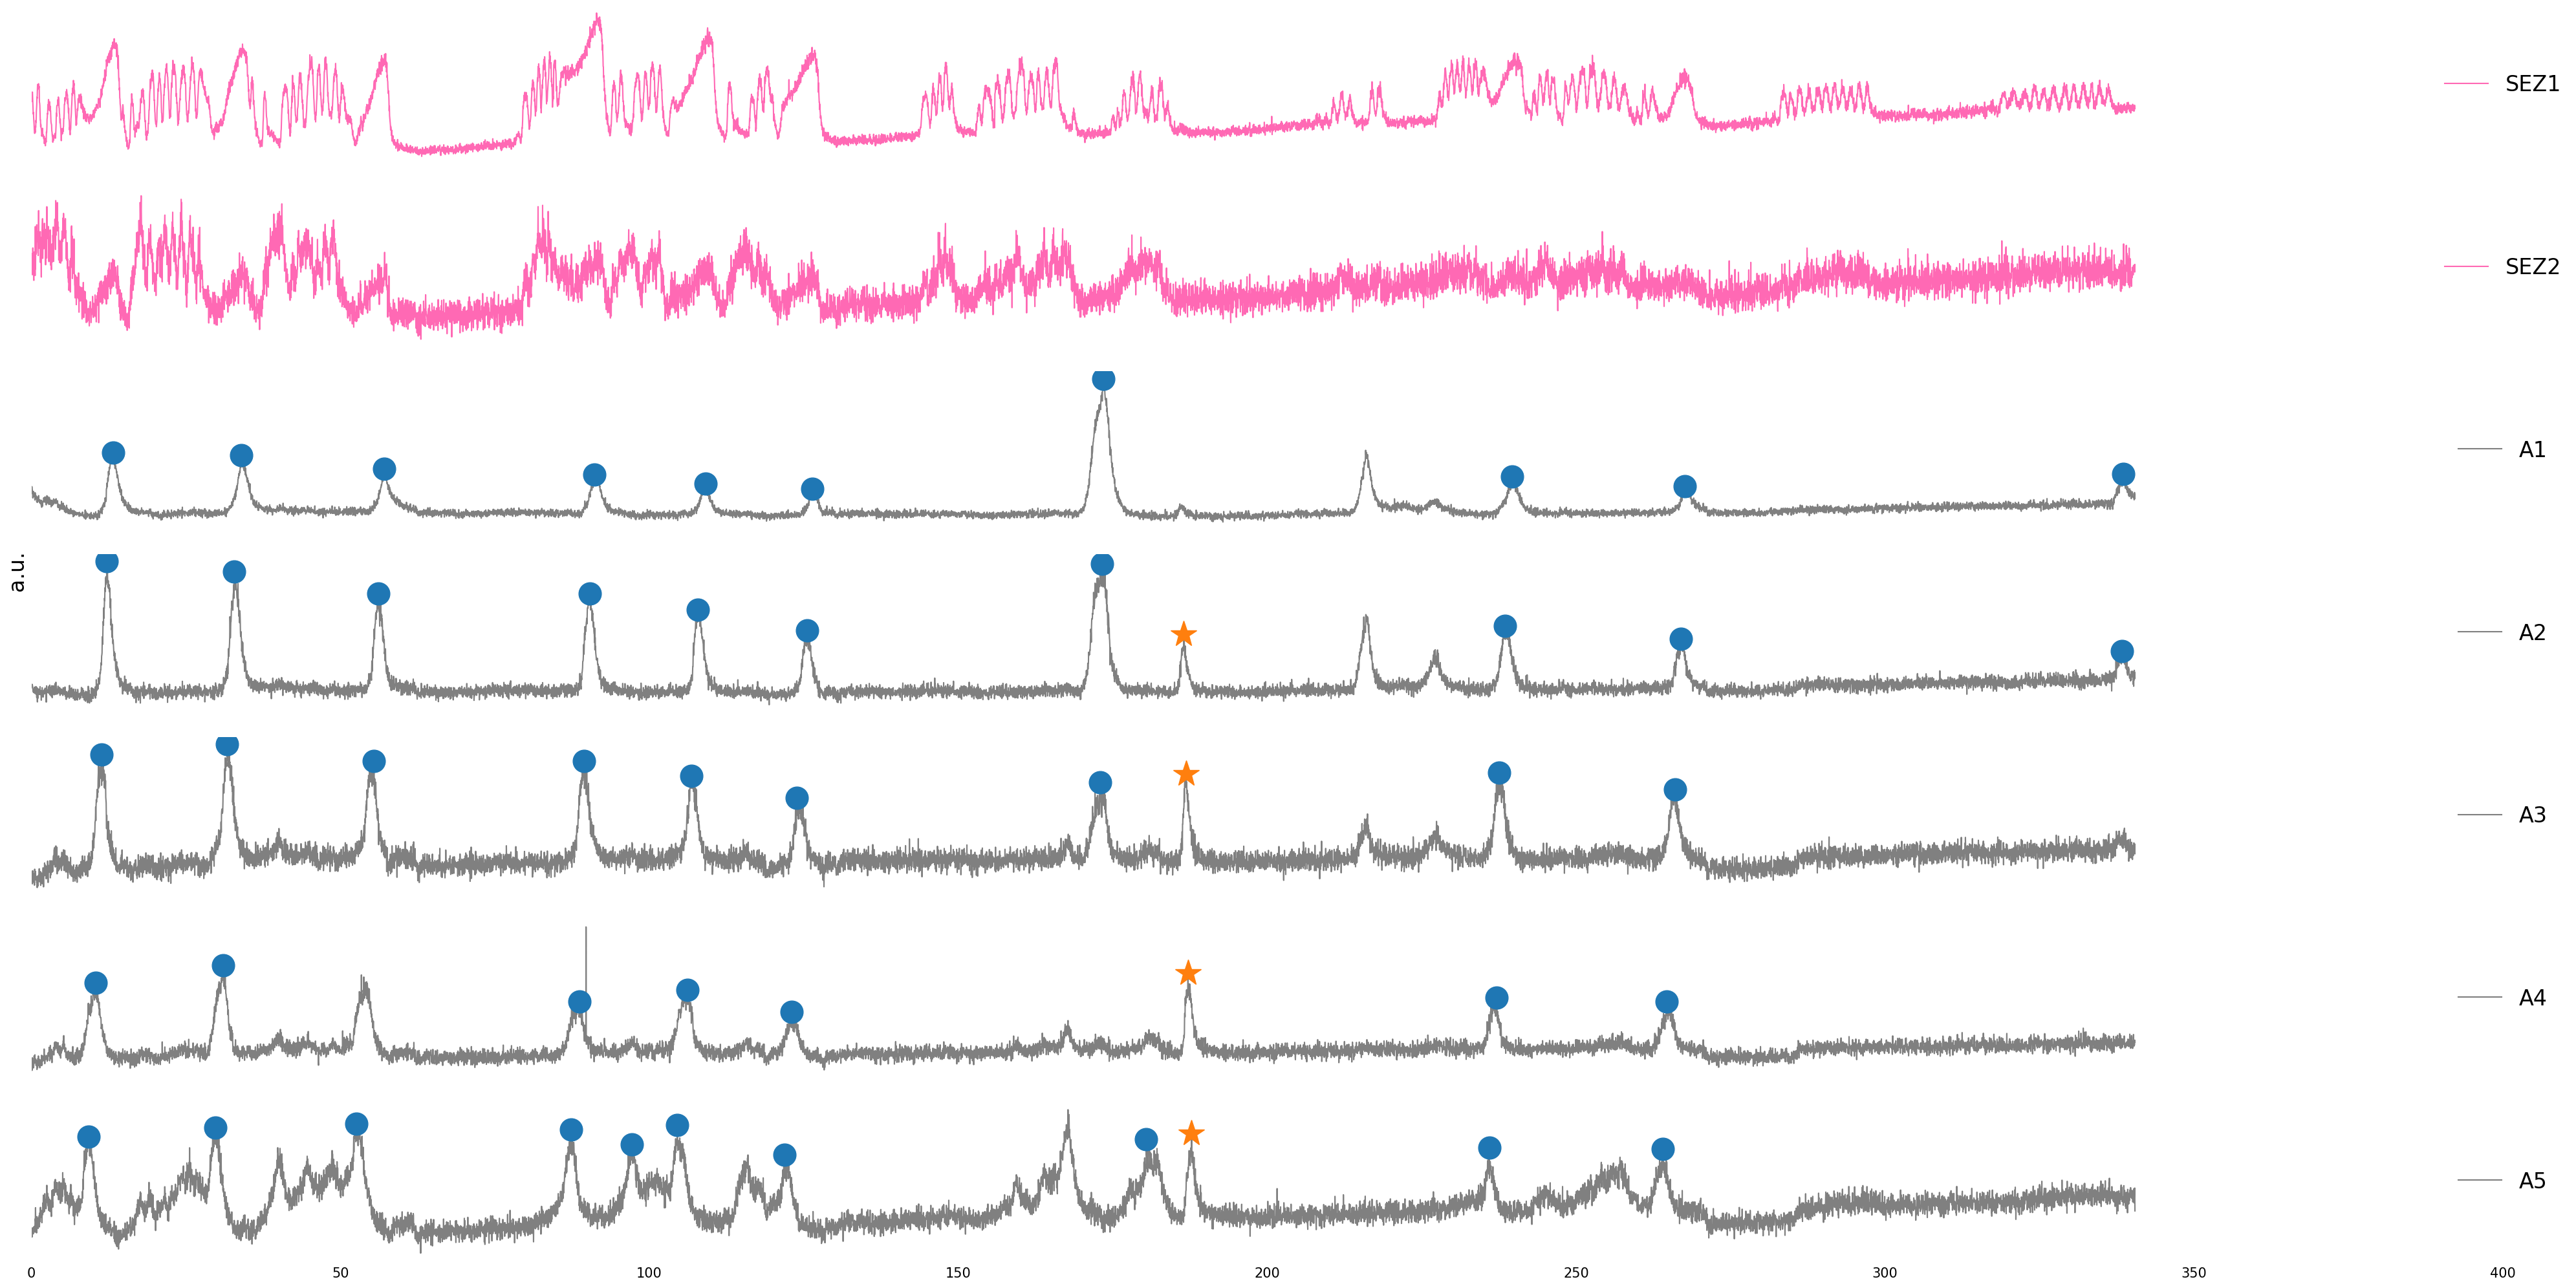

In [44]:
fig = plt.figure(figsize=(40.0, 20.0))
plt.ylabel("a.u.", fontsize = 24, y=0.55)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['bottom'].set_visible(False)
plt.gca().spines['left'].set_visible(False)
plt.tick_params(labelbottom=False, labelleft=False, labelright=False, labeltop=False, bottom=False, left=False, right=False, top=False)
#add_subplot()でグラフを描画する領域を追加する．引数は行，列，場所

def func2(F, time):
        param = scipy.optimize.curve_fit(lambda t,a,b:a*np.exp(b*t), time , F, p0 = (F[0], -0.000001))[0]
        return param[0] * np.exp(param[1]*time)
#        return (F-exp_base)/exp_base

mmean = []
for i in range(rang):
    mmean.append([])
for i in range(rang):
    mmean[i] = func2(Mean[i], time)

#Mean = preprocessing.minmax_scale(mmean, axis=1)
MeanM = []
for i in range(rang):
    MeanM.append([])

for i in range(rang):
    MeanM[i] = (Mean[i] - mmean[i])/mmean[i]

mean = preprocessing.minmax_scale(MeanM, axis=1)

rang_o_rang = rang_o_end - rang_o_start + 1
rang_w_rang = rang_w_end - rang_w_start + 1
rang_draw = rang_o_rang + rang_w_rang

#peakの取得
peaks = [0]*rang_w_rang
wid = 0.5 #(second)
for i in range(rang_w_rang):
    peaks[i], _ = find_peaks(mean[i+rang_o+rang_w_start-1], height=0.15, width=wid*30)
#print(peaks)

##burstの消去
#peaks周りの値を持ったリスト作成
peak_range = []
for i in range(len(peaks)):
    peak_range.append([])
for i in range(len(peaks)):
    for j in range(len(peaks[i])):
        peak_range[i].append(peaks[i][j])
        for k in range(same_range1):
            peak_range[i].append(peaks[i][j]+k+1)
            peak_range[i].append(peaks[i][j]-k-1)
#peak周りの値を持ったリストを一つに
ll = []
for i in range(len(peak_range)):
    ll = ll + peak_range[i]
#peak周りの値を持ったリストから重複分を削除
ly = []
for k,v in collections.Counter(ll).items():
    if v > 1:
        ly.append(k)
#burst分の削除準備        
def getNearestValue(list, num):
    """
    概要: リストからある値に最も近い値を返却する関数
    @param list: データ配列
    @param num: 対象値
    @return 対象値に最も近い値
    """

    # リスト要素と対象値の差分を計算し最小値のインデックスを取得
    idx = np.abs(np.asarray(list) - num).argmin()
    return list[idx]
#バーストのタイミングリスト
delete_list = []
for i in range(len(peaks)):
    delete_list.append([])
#fw or bw のリスト
true_list = []
for i in range(len(peaks)):
    true_list.append([])
#バースト消去
for i in range(len(peaks)):
    for j in range(len(peaks[i])):
        near = getNearestValue(ly, peaks[i][j])
        if np.abs(near - peaks[i][j]) <= same_range2:
            delete_list[i].append(peaks[i][j])
    #print(delete_list)
    true_list[i] = list(set(peaks[i]) - set(delete_list[i]))


## fw or bw の抽出

#true_list周りの値を持ったリスト作成
peak_range_f = []
peak_range_b = []
for i in range(len(true_list)):
    peak_range_f.append([])
    peak_range_b.append([])
for i in range(len(true_list)):
    for j in range(len(true_list[i])):
        peak_range_f[i].append(true_list[i][j])
        peak_range_b[i].append(true_list[i][j])
        for k in range(fw_range):
            peak_range_f[i].append(true_list[i][j]-k-1)
        for k in range(bw_range):
            peak_range_b[i].append(true_list[i][j]+k+1)
peak_range_f0 = []
for j in range(len(true_list[1])):
        peak_range_f0.append(true_list[1][j])
        for k in range(fw_range): #比較先がA2の後になるため参照レンジがA1のみ後ろに伸ばしたレンジになる
            peak_range_f0.append(true_list[1][j]+k+1)
peak_range_b0 = []
for j in range(len(true_list[1])):
        peak_range_b0.append(true_list[1][j])
        for k in range(bw_range): #比較先がA2の後になるため参照レンジがA1のみ前に伸ばしたレンジになる
            peak_range_b0.append(true_list[1][j]-k-1)

print(peak_range_b)
print(peak_range_f)
      
""" #peak周りの値を持ったリストを一つに
ll2 = []
for i in range(len(peak_range2)):
    ll2 = ll2 + peak_range2[i]
#peak周りの値を持ったリストから重複分を削除
ly2 = []
for k,v in collections.Counter(ll2).items():
    if v > 1:
        ly2.append(k) """

#fwの抽出      
#fw のリスト
true_list_f = []
for i in range(len(true_list)):
    true_list_f.append([])
#fwを構成するピークの内A1のリスト
for j in range(len(true_list[0])):
    near_f0 = getNearestValue(peak_range_f0, true_list[0][j])
    dif_f0 = -(near_f0 - true_list[0][j])
    if (0 <= dif_f0 and dif_f0 <= fw_range):
        true_list_f[0].append(true_list[0][j])
#fwを構成するピークのA1以外のリスト
for i in range(len(true_list)-1):
    for j in range(len(true_list[i+1])):
        near_f = getNearestValue(peak_range_f[i], true_list[i+1][j]) #比較先はA(i+1)の前になるため参照レンジはfw
        dif_f = near_f - true_list[i+1][j]
        if (0 <= dif_f and dif_f <= fw_range) :
            true_list_f[i+1].append(true_list[i+1][j])
#print(true_list_f)

#bwの抽出      
#bw のリスト
true_list_b = []
for i in range(len(true_list)):
    true_list_b.append([])
#bwを構成するピークの内A1のリスト
for j in range(len(true_list[0])):
    near_b0 = getNearestValue(peak_range_b0, true_list[0][j]) 
    dif_b0 = -(true_list[0][j] - near_b0)
    if (0 <= dif_b0 and dif_b0 <= bw_range):
            true_list_b[0].append(true_list[0][j])
#bwを構成するピークのA1以外のリスト
for i in range(len(true_list)-1):
    for j in range(len(true_list[i+1])):
        near_b = getNearestValue(peak_range_b[i], true_list[i+1][j]) #比較先はA(i+1)の前になるため参照レンジはbw
        dif_b = true_list[i+1][j] - near_b
        if (0 <= dif_b and dif_b <= bw_range) :
            true_list_b[i+1].append(true_list[i+1][j])
# 拾えなかったA2分を補正
hosei_range_b1 = []
for j in range(len(true_list[2])):
        hosei_range_b1.append(true_list[2][j])
        for k in range(bw_range): #比較先がA3の後になるため参照レンジはfw
            hosei_range_b1.append(true_list[2][j]-k-1)
for j in range(len(true_list[1])):
    near_b1 = getNearestValue(hosei_range_b1, true_list[1][j]) 
    dif_b1 = -(true_list[1][j] - near_b1)
    if (0 <= dif_b1 and dif_b1 <= bw_range):
            true_list_b[1].append(true_list[1][j])
#print(true_list_b)

ax = []
for i in range(rang_draw):
    ax.append(fig.add_subplot(rang_draw, 1, i+1))
    plt.xlim(tlim_start,tlim_end)
    if i <= (rang_draw-2):
        plt.xticks(color="None")

plt.tick_params(labelsize=15)        

if rang_o_start > 0:
    for i in range(rang_o_rang):
        ax[i].plot(time, mean[i+rang_o_start-1], color=c[i+rang_o_start-1], label=l[i+rang_o_start-1])
    #    ax[i].plot(time[true_list[i+rang_o_start-1]], mean[i+rang_o_start-1][true_list[i+rang_o_start-1]], ".", markersize =50)
        ax[i].spines['right'].set_visible(False)
        ax[i].spines['top'].set_visible(False)
        ax[i].spines['bottom'].set_visible(False)
        ax[i].spines['left'].set_visible(False)    
        ax[i].legend(bbox_to_anchor=anchor_legend, loc =location_legend, fontsize=font_legend, frameon=False)
        ax[i].tick_params(labelbottom=True, labelleft=False, labelright=False, labeltop=False)
        ax[i].tick_params(bottom=False, left=False, right=False, top=False)

if rang_w_start > 0:
    for i in range(rang_w_rang):
        ax[i+rang_o_rang].plot(time, mean[i+rang_o+rang_w_start-1], color=c[i+rang_o+rang_w_start-1], label=l[i+rang_o+rang_w_start-1])
        ax[i+rang_o_rang].plot(time[true_list_f[i]], mean[i+rang_o+rang_w_start-1][true_list_f[i]], ".", markersize =50)
        ax[i+rang_o_rang].plot(time[true_list_b[i]], mean[i+rang_o+rang_w_start-1][true_list_b[i]], "*", markersize =30)
        ax[i+rang_o_rang].spines['right'].set_visible(False)
        ax[i+rang_o_rang].spines['top'].set_visible(False)
        ax[i+rang_o_rang].spines['bottom'].set_visible(False)
        ax[i+rang_o_rang].spines['left'].set_visible(False)    
        ax[i+rang_o_rang].legend(bbox_to_anchor=anchor_legend, loc =location_legend, fontsize=font_legend, frameon=False)
        ax[i+rang_o_rang].tick_params(labelbottom=True, labelleft=False, labelright=False, labeltop=False)
        ax[i+rang_o_rang].tick_params(bottom=False, left=False, right=False, top=False)

fig.tight_layout()              #レイアウトの設定
plt.show()